**Volcano-tomography catalogue** © 2020 Michele Paulatto, Kajetan Chrapkiewicz, ...

# Figure 9 - Melt histogram
This notebook can be used to reproduce figure 6 of the manuscript

Requirements:
- Pandas: https://pandas.pydata.org/
- Numpy
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('../database/Catalogue_v1.0.xlsx',header=[0],sheet_name="Volcanoes")

df.Volcano_Number = df.Volcano_Number.fillna(0).astype(int)

df.dtypes
df.head()

,Volcano_Name,Location,Country,Region,Subregion,Volcano_Number,Longitude,Latitude,Tectonic_Setting,Primary_Volcano_Type,Elevation,Major_Rock_Type,Last_Eruption_Year,Max_Erupted_Volume,Max_VEI
0,Agung,Bali,Indonesia,NaN,Indonesia,264020,115.508,-8.343,Subduction,Stratovolcano,2997.0,Andesite,2019 CE,NaN,NaN
1,Aira,Kyushu,Japan,NaN,Japan,282080,130.657,31.593,Subduction,Caldera,1117.0,Andesite,2021 CE,NaN,NaN
2,Akutan,Alaska,USA,NaN,USA,311320,-165.986,54.134,Subduction,Stratovolcano,1303.0,Basalt - andesite,1992 CE,NaN,NaN
3,Asama,Honshu,Japan,NaN,Japan,283110,138.523,36.406,Subduction,Complex,2568.0,Andesite,2019 CE,NaN,NaN
4,Askja,Iceland,Iceland,NaN,Iceland,373060,-16.783,65.033,Rift,Stratovolcano,1080.0,Basalt,1961 CE,NaN,5.0


In [2]:
datatypes={"Volcano_Name":str,
           "Volcano_Number":np.int32,
           "Date_Start":np.float64,
           "Date_End":np.float64,
           "OBS_Stations":np.float64,
           "Land_Stations":np.float64,
           "Sonobuoys":np.float64,
           "Shots":np.float64,
           "Earthquakes":np.float64,
           "Phases":str,
           "Imaging_Method":str,
           "Frequency_Range":str,
           "Physical_Properties":str,
           "Anomaly_Description":str,
           "Depth_Top":np.float64,
           "Depth_Bottom":np.float64,
           "Vp":np.float64,
           "Vs":np.float64,
           "Reference_Vp":np.float64,
           "Reference_Vs":np.float64,
           "Vp_Anomaly":np.float64,
           "Vs_Anomaly":np.float64,
           "Vp/Vs":np.float64,
           "Other":str,
           "Resolution_Length_Diameter":np.float64,
           "Melt_Min":np.float64,
           "Melt_Max":np.float64,
           "Melt_Best":np.float64,
           "Anomaly_Radius":np.float64,
           "Radius_Uncertainty":np.float64,
           "Anomaly_Thickness":np.float64,
           "Thickness_Uncertainty":np.float64,
           "Anomaly_Volume":np.float64,
           "Melt_Volume":np.float64,
           "Melt_Method":str,
           "Reference":str,
           "Year":np.int32,
           "DOI":str,
           "Code":str,
           "Dataset":str,
           "Ship":str,
           "URL":str,
           "Comments":str,
           "Stars":np.float64,
           }

               
pp = pd.read_excel('../database/Catalogue_v1.0.xlsx',header=[0],sheet_name="Data",dtype=datatypes)
pp.OBS_Stations = pp.OBS_Stations.fillna(0)
pp.Land_Stations = pp.Land_Stations.fillna(0)
pp.Shots = pp.Shots.fillna(0)
pp.Earthquakes = pp.Earthquakes.fillna(0)
pp.Sonobuoys = pp.Sonobuoys.fillna(0)


#pp.head()
#pp.dtypes

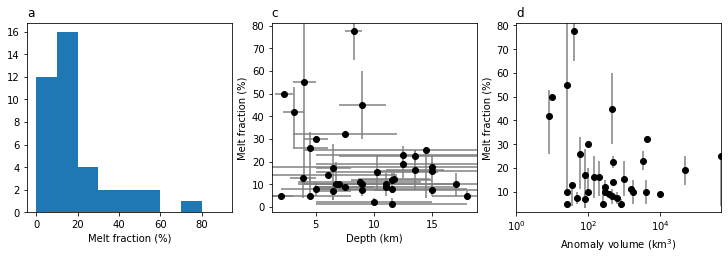

In [3]:

#---------------
melt = pp.Melt_Best.fillna(np.nan)
meltmin = pp.Melt_Min.fillna(np.nan)
meltmax = pp.Melt_Max.fillna(np.nan)
melterr=[melt-meltmin,meltmax-melt]
vol = pp.Anomaly_Volume.fillna(np.nan)
name=pp.Volcano_Name.fillna(np.nan)
method=pp.Imaging_Method.fillna(np.nan)

meltmelt=melt[melt>0].values


depth = (pp.Depth_Top.fillna(np.nan)+pp.Depth_Bottom.fillna(np.nan))/2
depth_err = (pp.Depth_Top.fillna(np.nan)-pp.Depth_Bottom.fillna(np.nan))/2

vp = pp.Vp.fillna(np.nan)
vs = pp.Vs.fillna(np.nan)
vpa = pp.Vp_Anomaly.fillna(np.nan)
vsa = pp.Vs_Anomaly.fillna(np.nan)


#---------------

#plt.hist(year,bins=range(1975,2022,1),stacked=True)
fig=plt.figure(figsize=(10,3.5),constrained_layout=True)


plt.subplot(1,3,1)
plt.hist(meltmelt,bins=range(0,100,10))
plt.xlabel('Melt fraction (%)')
plt.title("a",loc="left")

plt.subplot(1, 3, 2)
plt.errorbar(depth,melt,xerr=depth_err,yerr=melterr,fmt='ok',ecolor='gray')
plt.xlabel('Depth (km)')
plt.ylabel('Melt fraction (%)')        
plt.title("c",loc="left")

plt.subplot(1, 3, 3)
plt.errorbar(vol,melt,yerr=melterr,fmt='ok',ecolor='gray')
plt.xlabel('Anomaly volume (km$^3$)')
plt.ylabel('Melt fraction (%)')
plt.xlim([1,500000])
plt.xscale("log")
plt.title("d",loc="left")


plt.show()
fig.savefig("paperfigures/Fig_9_melt.pdf")
fig.savefig("paperfigures/Fig_9_melt.png")
